# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## Sentimentanalyse im Kontext von Corona

In [1]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
import matplotlib.dates as mdates 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp


# Import NLP Packages
import nltk
import spacy

In [2]:
# Methoden aus anderem Modul importieren
import Sentiment_Methods

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


c:\Users\paula\anaconda3\envs\env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Datensätze vorbereiten

In [62]:
# df Legislaturperiode 2019 (24.10.2017-26.09.21)
# Import des vorselektierten Dataframes der Legislaturperiode 19 mit gegebenen Sentiment-Werten 
df_sentiment19 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\modellorginal.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

# Import des vorselektierten Dataframes der Legislaturperiode 20 mit gegebenen Sentiment-Werten 
df_sentiment20 = pd.read_csv(r"C:\Users\paula\OneDrive\Uni\2. Lernpools Master\3. Semester\Soziologie\modellorginal.csv")
df_sentiment20['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment20.sort_values(by='date')

,Unnamed: 0,satz,id,period,date,name,party,redner_id,discussion_title,text,tokenized_text,tokens,cleaned_text,Sentiment_Label,Sentiment_Score
19286,20026,Europa und die Globalisierung: Das ist heute d...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Europa', 'Globalisierung', 'heute', 'Rahmen'...",Europa Globalisierung heute Rahmen debattieren...,neutral,0.999854
19187,19927,Er war zwölf Jahre ein großartiger Bundestagsp...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['zwölf', 'Jahre', 'großartiger', 'Bundestagsp...",zwölf Jahre großartiger Bundestagspräsident,neutral,0.999984
19186,19926,"Vor allen Dingen aber, meine sehr verehrten Da...",ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['Dingen', 'verehrten', 'möchte', 'Norbert', '...",Dingen verehrten möchte Norbert Lammert danken,neutral,0.958987
19185,19925,Damit nehme ich jetzt die Wahl vorweg; das ist...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['nehme', 'Wahl', 'vorweg', 'bisschen', 'schwi...",nehme Wahl vorweg bisschen schwierig,positive,0.843615
19184,19924,Ich danke natürlich auch den beiden Vizepräsid...,ID19101300,19,2017-10-24,Hermann Otto Solms,FDP,11002190,Tagesordnungspunkt 4 2017-10-24,Herr Bundespräsident! Verehrte Kolleginnen und...,"['Herr Bundespräsident!', 'Verehrte Kolleginne...","['danke', 'natürlich', 'beiden', 'Vizepräsiden...",danke natürlich beiden Vizepräsidentinnen näch...,neutral,0.978398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48520,50363,"Aber, meine Damen und Herren, im Großen und Ga...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Großen', 'Ganzen', 'deutliche', 'Fortschritt...",Großen Ganzen deutliche Fortschritte gemacht r...,positive,0.962056
48519,50362,"Es gibt kleine Schwierigkeiten nach wie vor, a...",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['gibt', 'kleine', 'Schwierigkeiten', 'vielen'...",gibt kleine Schwierigkeiten vielen Stellen gra...,neutral,0.999985
48518,50361,"Das sind Dinge, die kann man benennen.",ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Dinge', 'benennen']",Dinge benennen,negative,0.708503
48527,50370,Deshalb kann man sagen: Als ich 2005 Bundeskan...,ID1923900100,19,2021-09-07,Angela Merkel,CDU/CSU,11001478,Tagesordnungspunkt 1 2021-09-07,Sehr geehrter Herr Präsident! Liebe Kolleginne...,"['Sehr geehrter Herr Präsident!', 'Liebe Kolle...","['Deshalb', 'sagen', '2005', 'Bundeskanzlerin'...",Deshalb sagen 2005 Bundeskanzlerin wurde lagen...,neutral,0.986180


In [63]:
#Einlesen der Corona Fallzahlen für den Zeitraum 25.02.2020-21.04.2023
url="https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv"
corona_fallzahlen = pd.read_csv(url,parse_dates=[0])

#Changing the wording of meldedatum to date
corona_fallzahlen.rename(columns={'Meldedatum': 'date'}, inplace=True)
corona_fallzahlen['date'] = pd.to_datetime(corona_fallzahlen['date'])
corona_fallzahlen.sort_values(by='date')

,date,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
0,2020-01-03,00-04,3975333,0,0,0,0.0
1,2020-01-03,00+,83237124,1,1,0,0.0
2,2020-01-03,05-14,7631602,0,0,0,0.0
3,2020-01-03,15-34,18795840,0,0,0,0.0
4,2020-01-03,35-59,28403806,0,0,0,0.0
...,...,...,...,...,...,...,...
9416,2023-09-09,00+,83237124,38469495,681,6332,7.6
9417,2023-09-09,05-14,7631602,4497140,13,103,1.3
9418,2023-09-09,15-34,18795840,11183463,108,1041,5.5
9419,2023-09-09,35-59,28403806,14969964,188,1751,6.2


In [69]:
# Im Nächsten Schritt wollen wir den Dataframe filtern damit wir nur die Fälle auf Bundesebene für alle Alltersgruppen = Merkamle ID_ Altersgruppr = 00+ erhalten 
corona_fallzahlen_gesamt = corona_fallzahlen[corona_fallzahlen["Altersgruppe"]== "00+"]
corona_fallzahlen_gesamt


,date,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
1,2020-01-03,00+,83237124,1,1,0,0.0
8,2020-01-04,00+,83237124,1,0,0,0.0
15,2020-01-05,00+,83237124,1,0,0,0.0
22,2020-01-06,00+,83237124,1,0,0,0.0
29,2020-01-07,00+,83237124,1,0,0,0.0
...,...,...,...,...,...,...,...
9388,2023-09-05,00+,83237124,38464791,1440,5495,6.6
9395,2023-09-06,00+,83237124,38466304,1513,5946,7.1
9402,2023-09-07,00+,83237124,38467559,1255,6139,7.4
9409,2023-09-08,00+,83237124,38468814,1255,6431,7.7


## 3. Deskriptive Datenanalyse 

### I. Corona Fallzahlen 

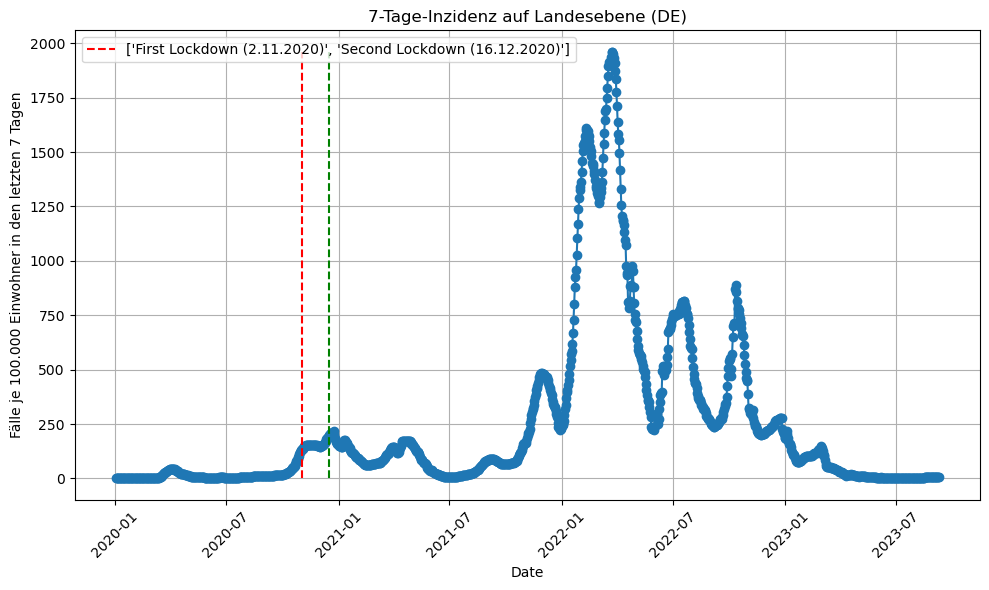

In [71]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen)')
plt.grid(True)
plt.xticks(rotation=45)

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--', label=['First Lockdown (2.11.2020)', 'Second Lockdown (16.12.2020)'])

# Customize the plot
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### II. Sentiment

In [ ]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste19 = Sentiment_Methods.plot_most_frequent_ngrams (df19_Covid_cleaned)
ngram_Stoppwortliste20 = Sentiment_Methods.plot_most_frequent_ngrams (df20_Covid_cleaned)

In [ ]:
Sentiment_Methods.plot_sentiment_analysis(modell_original19, modell_processed19)

Sentiment_Methods.plot_sentiment_wordclouds (modell_cleaned19)
Sentiment_Methods.plot_sentiment_wordclouds (modell_processed19)

In [ ]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
plot_sentiment_by_party(modell_processed)

plot_sentiment_by_party(modell_original)

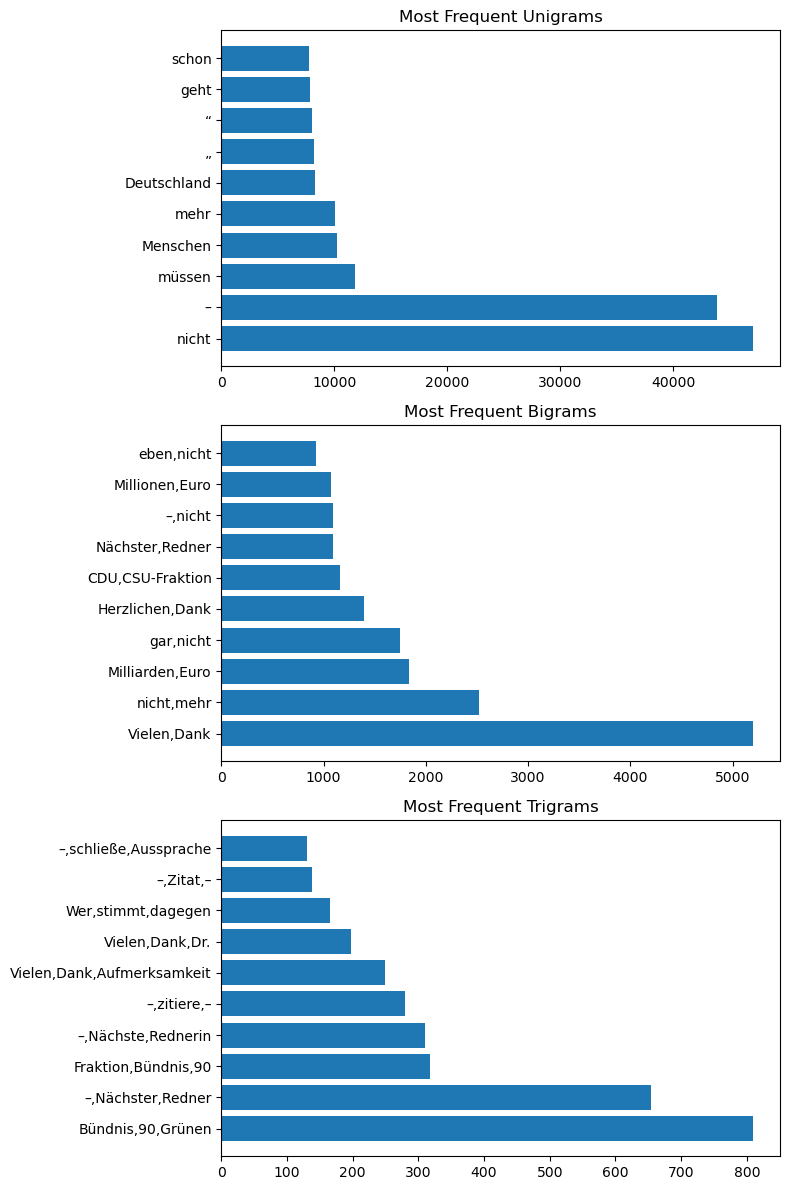

In [ ]:
ngram_19 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment19)

In [ ]:
# Wir sehen auf Basis dessen, dass 

## 5. Sentimentanalyse

In [ ]:
plot_sentiment_analysis(modell_original, modell_processed)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
Methoden_Sentiment.plot_sentiment_wordclouds (df_sentiment19)

AttributeError: module 'Methoden_Sentiment' has no attribute 'plot_sentiment_wordclouds'

### Sentiment-Analyse nach Parteizugehörigkeit

In [ ]:
# Plotten nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
Methoden_Sentiment.plot_sentiment_by_party(df_sentiment19)

#plot_sentiment_by_party(df_sentiment19)



AttributeError: module 'Methoden_Sentiment' has no attribute 'plot_sentiment_by_party'